# **Data preprocessing of Chronic kidney disease dataset**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install dython
from dython.nominal import associations
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.2 requires matplotlib>=3.4.3, but you have matplotlib 3.1.3 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv(r'/content/drive/MyDrive/ckd dataset2.csv')
df

## EXPLORATORY DATA ANALYSIS

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              0 non-null      float64
 1   age             400 non-null    int64  
 2   bp              391 non-null    float64
 3   sg              388 non-null    float64
 4   al              353 non-null    float64
 5   su              354 non-null    float64
 6   rbc             351 non-null    float64
 7   pc              248 non-null    object 
 8   pcc             335 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             396 non-null    object 
 11  bu              356 non-null    float64
 12  sc              381 non-null    float64
 13  sod             383 non-null    float64
 14  pot             313 non-null    float64
 15  hemo            312 non-null    float64
 16  pcv             348 non-null    float64
 17  wc              330 non-null    obj

In [8]:
def convert_dtype(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that 


In [9]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(df,i)

CHECKING THE CKD AND NN CKD

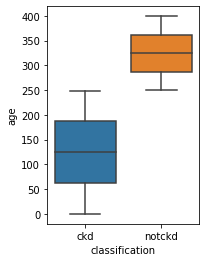

In [10]:
plt.subplot(1,2,1)
sns.boxplot(x=df['classification'],y=df['age'])

In [11]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [13]:
cat_col,num_col=extract_cat_num(df)


## Analysing distribution of each and every column

In [14]:
len(num_col)

15

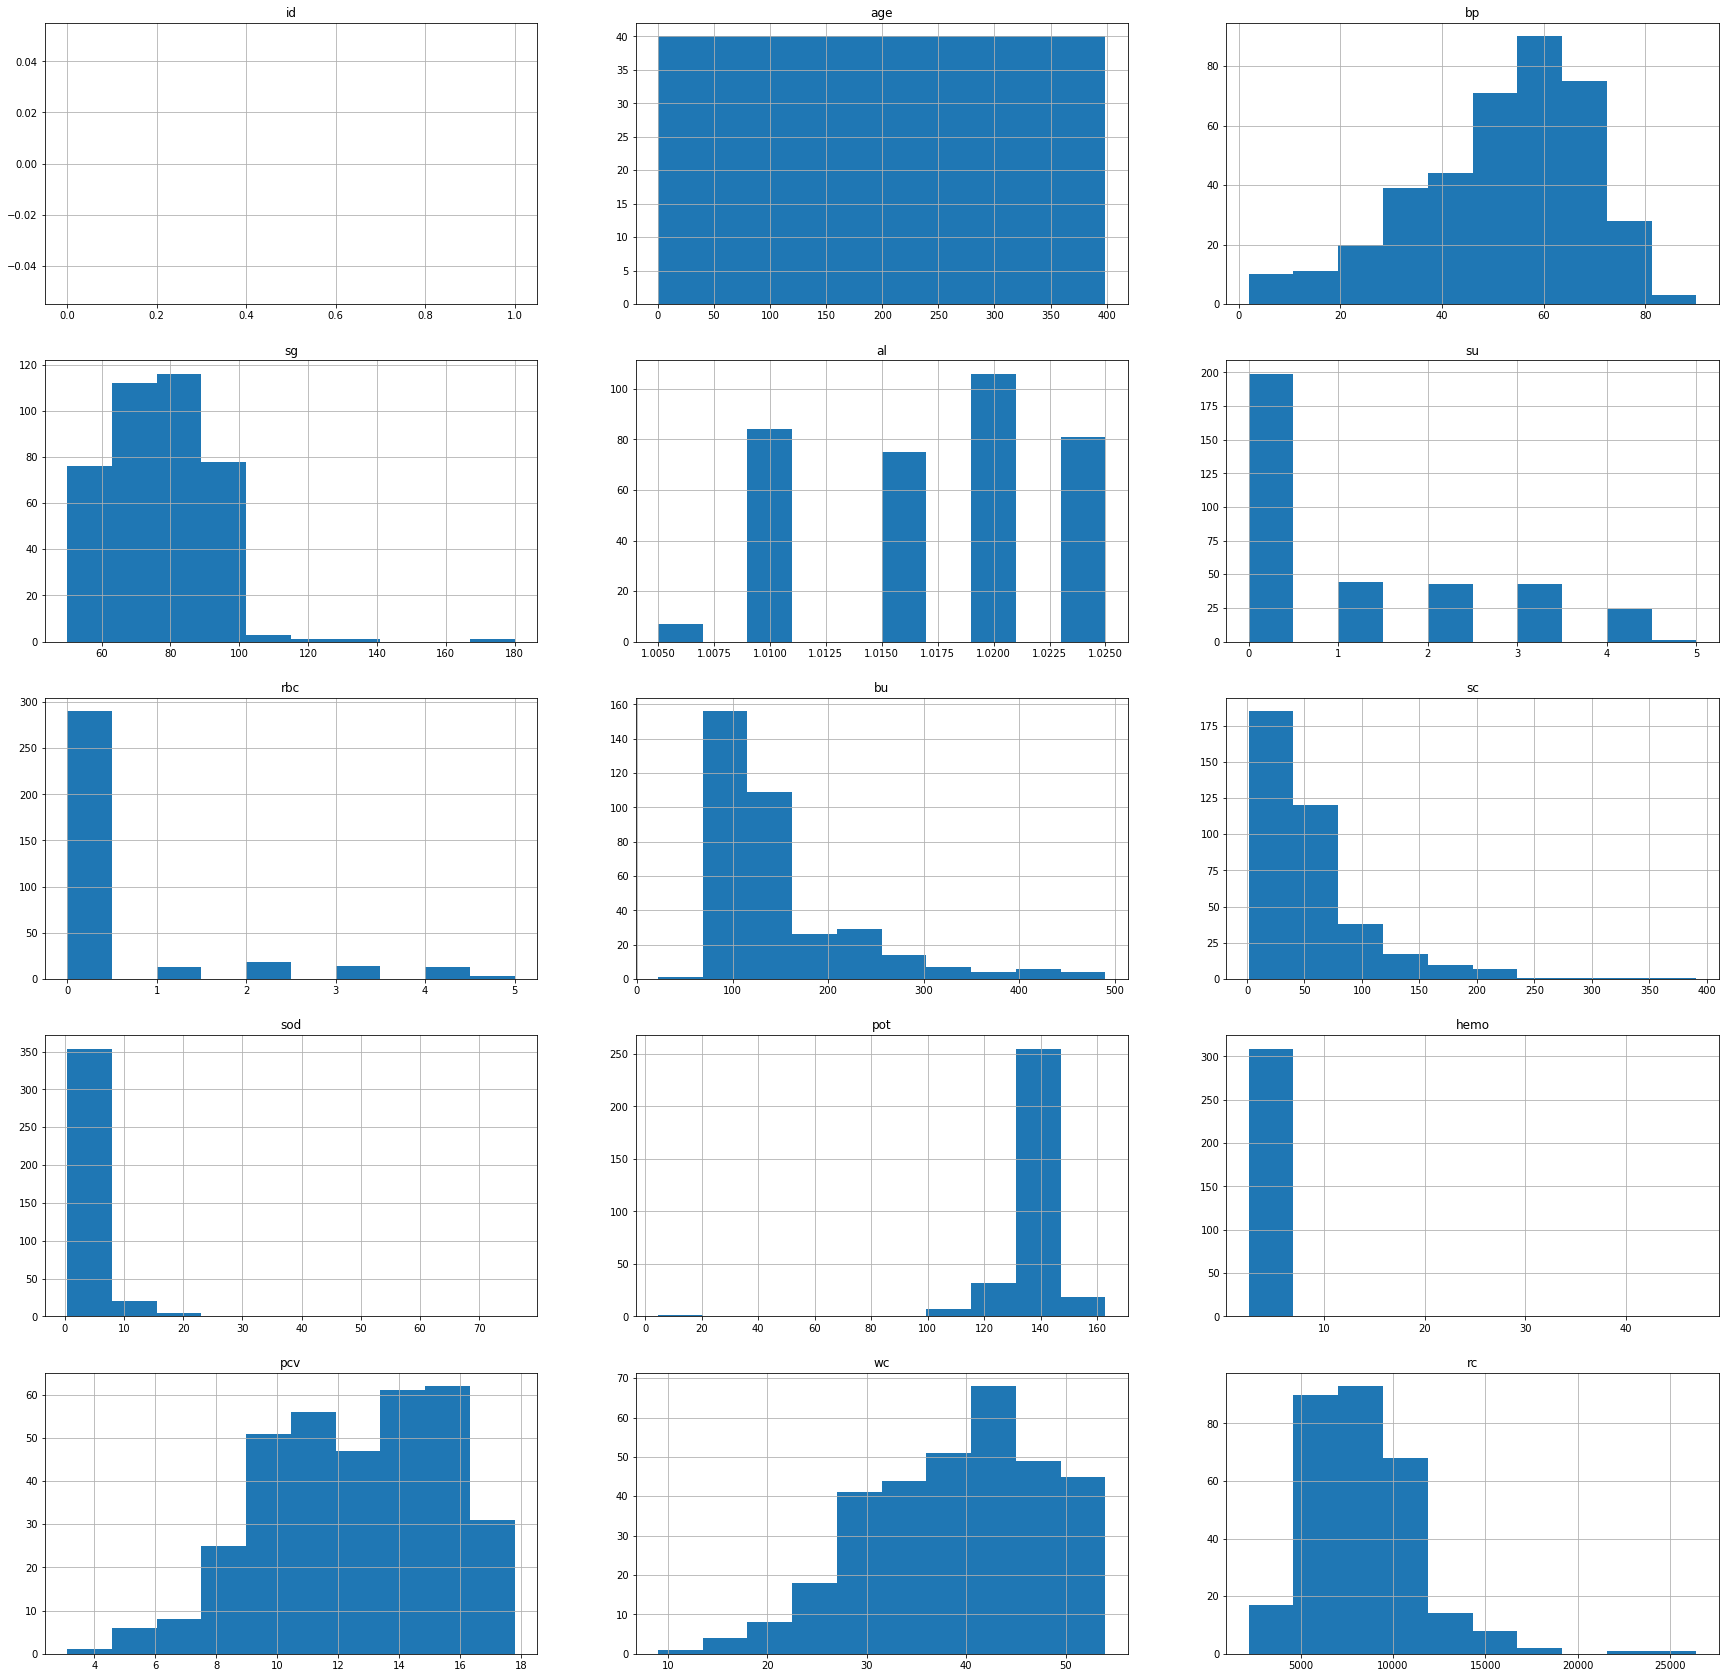

In [15]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)      
    df[feature].hist()
    plt.title(feature)

# Check  distribution of categorical Data


In [16]:
len(cat_col)

11

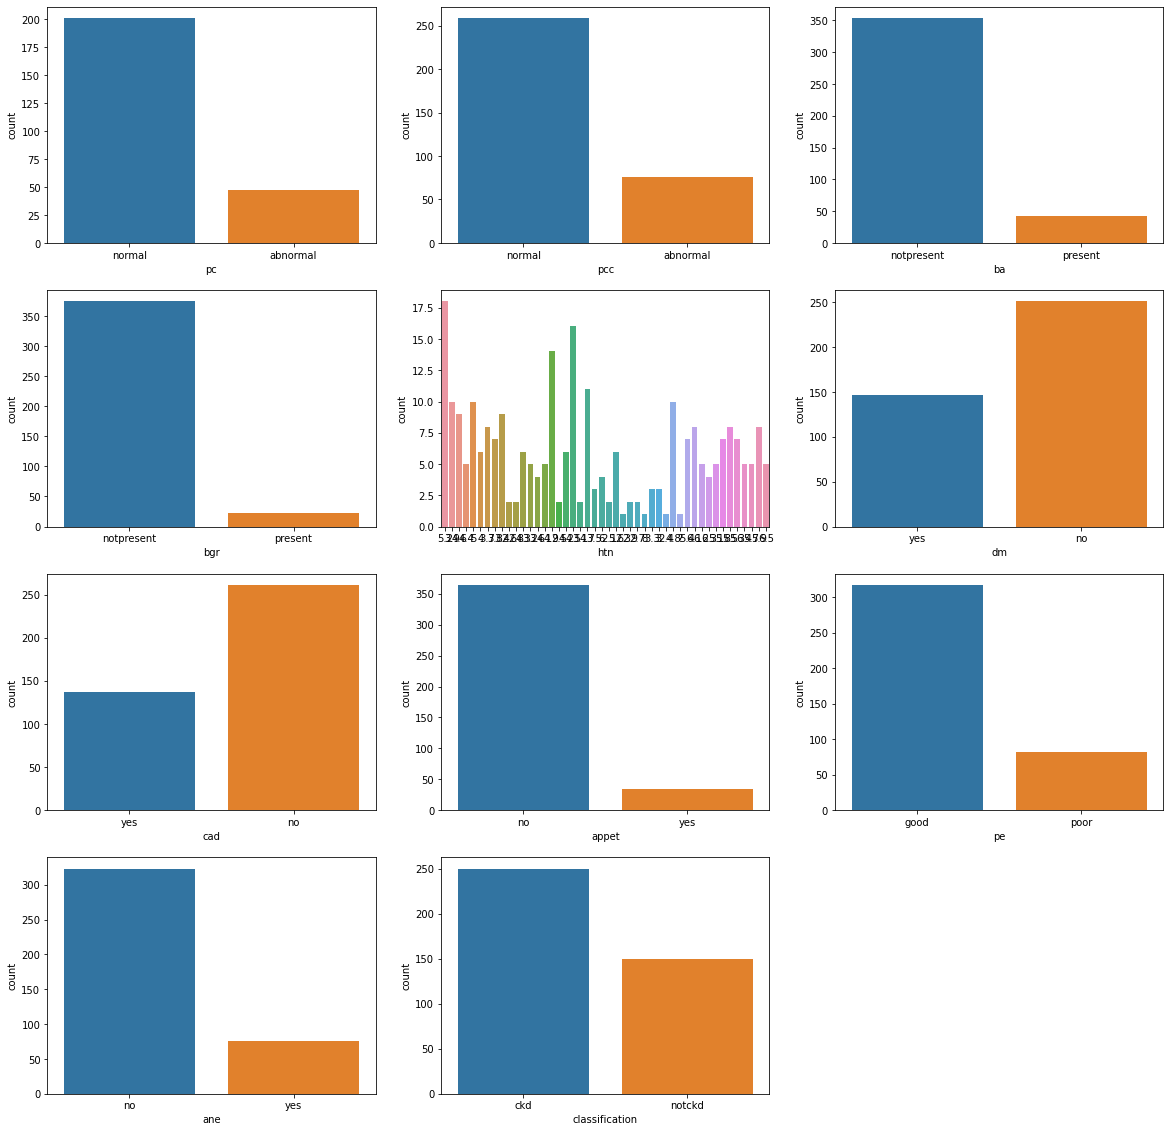

In [18]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

In [19]:
df.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])


count          mean   median     min      max
rbc classification                                               
0.0 ckd                94   8791.489362   8250.0  2200.0  21600.0
    notckd            138   7731.159420   7500.0  4300.0  11000.0
1.0 ckd                10  10520.000000  10400.0  5400.0  15200.0
2.0 ckd                13  10684.615385   9800.0  5800.0  26400.0
3.0 ckd                 8   9837.500000   9700.0  5000.0  14900.0
4.0 ckd                 9   9166.666667   8800.0  6700.0  13600.0
5.0 ckd                 3  10033.333333   9600.0  8500.0  12000.0

## Relationship between haemoglobin and packed cell volume


Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

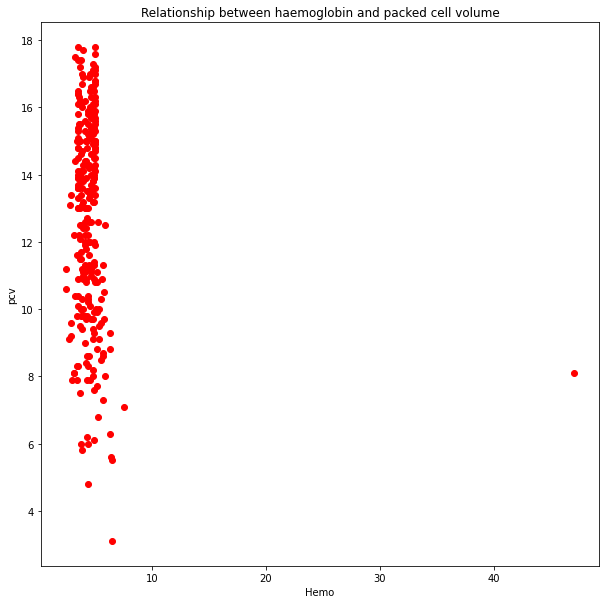

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x=df.hemo,y=df['pcv'],color="red")
plt.xlabel('Hemo')
plt.ylabel('pcv')
plt.title('Relationship between haemoglobin and packed cell volume')

## Analyse distribution of red blood cell count chronic as well as non chronic


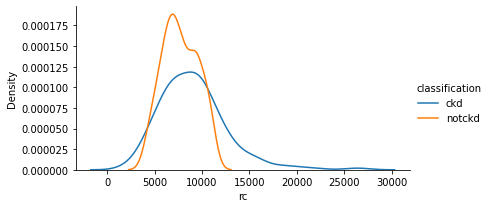

In [20]:
grid=sns.FacetGrid(df,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

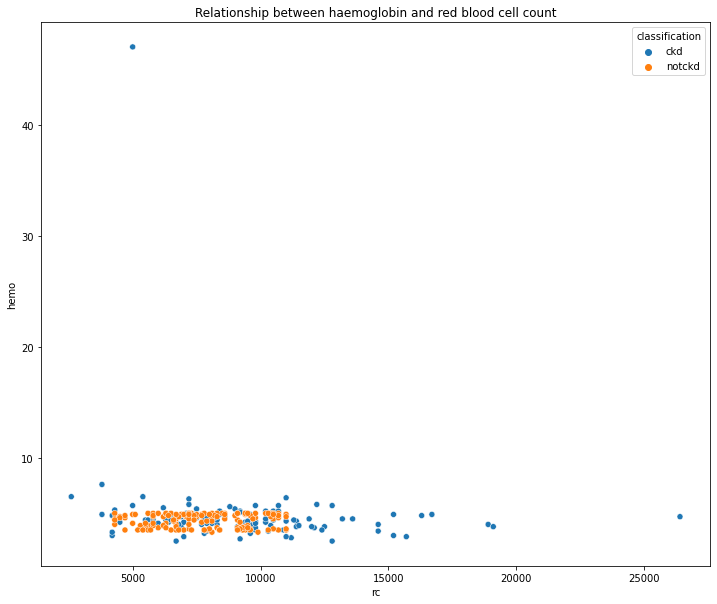

In [22]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['rc'],y=df['hemo'],hue=df['classification'])
plt.xlabel('rc')
plt.ylabel('hemo')
plt.title('Relationship between haemoglobin and red blood cell count')

## CORRELATION

In [23]:

from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['pc',
 'pcc',
 'ba',
 'bgr',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

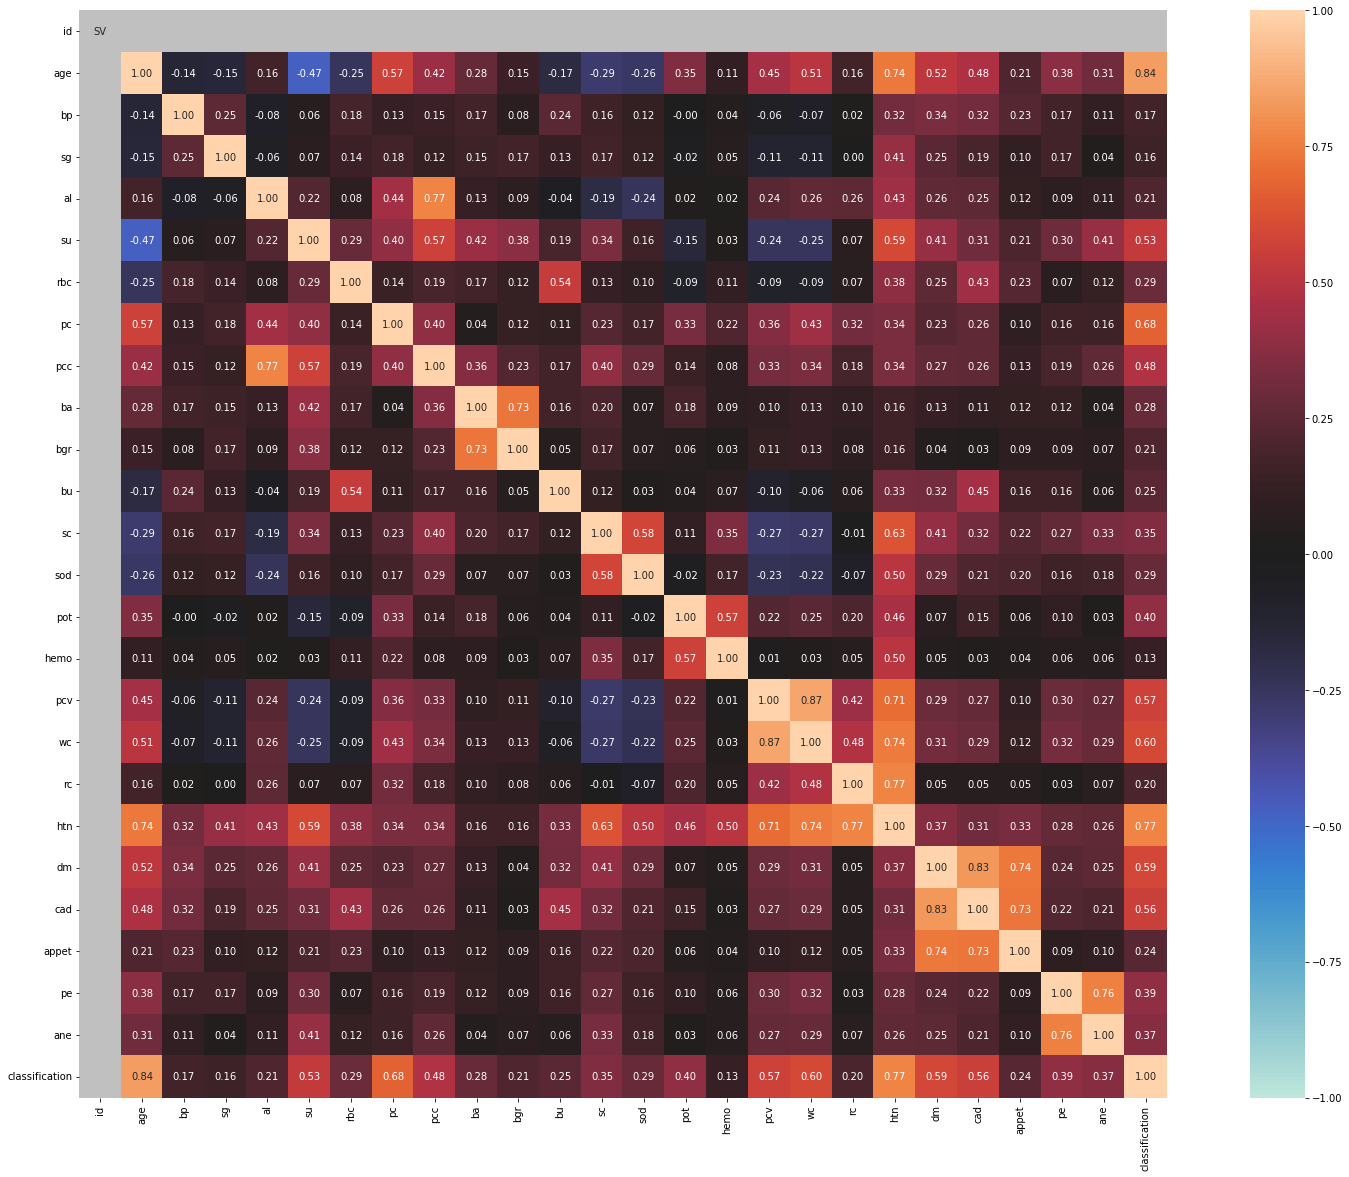

In [24]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(30,20))

## COMPLETE CORRELATION DATASET

In [25]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='nipy_spectral_r', axis=None).set_precision(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
age,0.00,1.00,-0.14,-0.15,0.16,-0.47,-0.25,0.57,0.42,0.28,0.15,-0.17,-0.29,-0.26,0.35,0.11,0.45,0.51,0.16,0.74,0.52,0.48,0.21,0.38,0.31,0.84
bp,0.00,-0.14,1.00,0.25,-0.08,0.06,0.18,0.13,0.15,0.17,0.08,0.24,0.16,0.12,-0.00,0.04,-0.06,-0.07,0.02,0.32,0.34,0.32,0.23,0.17,0.11,0.17
sg,0.00,-0.15,0.25,1.00,-0.06,0.07,0.14,0.18,0.12,0.15,0.17,0.13,0.17,0.12,-0.02,0.05,-0.11,-0.11,0.00,0.41,0.25,0.19,0.10,0.17,0.04,0.16
al,0.00,0.16,-0.08,-0.06,1.00,0.22,0.08,0.44,0.77,0.13,0.09,-0.04,-0.19,-0.24,0.02,0.02,0.24,0.26,0.26,0.43,0.26,0.25,0.12,0.09,0.11,0.21
su,0.00,-0.47,0.06,0.07,0.22,1.00,0.29,0.40,0.57,0.42,0.38,0.19,0.34,0.16,-0.15,0.03,-0.24,-0.25,0.07,0.59,0.41,0.31,0.21,0.30,0.41,0.53
rbc,0.00,-0.25,0.18,0.14,0.08,0.29,1.00,0.14,0.19,0.17,0.12,0.54,0.13,0.10,-0.09,0.11,-0.09,-0.09,0.07,0.38,0.25,0.43,0.23,0.07,0.12,0.29
pc,0.00,0.57,0.13,0.18,0.44,0.40,0.14,1.00,0.40,0.04,0.12,0.11,0.23,0.17,0.33,0.22,0.36,0.43,0.32,0.34,0.23,0.26,0.10,0.16,0.16,0.68
pcc,0.00,0.42,0.15,0.12,0.77,0.57,0.19,0.40,1.00,0.36,0.23,0.17,0.40,0.29,0.14,0.08,0.33,0.34,0.18,0.34,0.27,0.26,0.13,0.19,0.26,0.48
ba,0.00,0.28,0.17,0.15,0.13,0.42,0.17,0.04,0.36,1.00,0.73,0.16,0.20,0.07,0.18,0.09,0.10,0.13,0.10,0.16,0.13,0.11,0.12,0.12,0.04,0.28


In [26]:
df.corr().style.background_gradient(cmap="nipy_spectral_r")

,id,age,bp,sg,al,su,rbc,bu,sc,sod,pot,hemo,pcv,wc,rc
id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,nan,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298,0.630019,-0.198641
bp,nan,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339
sg,nan,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753
al,nan,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215
su,nan,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989
rbc,nan,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893
bu,nan,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015
sc,nan,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462
sod,nan,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390


In [27]:
df=df.drop(["id"],axis=1)

In [28]:
df=df.drop(["age"],axis=1)

In [29]:
df=df.drop(["wc"],axis=1)

In [30]:
df.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

## DESCRIPTIVE STATISTICS

In [31]:
df.describe()

,bp,sg,al,su,rbc,bu,sc,sod,pot,hemo,pcv,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,294.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,8406.122449
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,2944.474190
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2200.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,6500.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,8000.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,9800.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,26400.000000


## NULL VALUES

In [32]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

bp         9
sg        12
al        47
su        46
rbc       49
pc       152
pcc       65
ba         4
bgr        4
bu        44
sc        19
sod       17
pot       87
hemo      88
pcv       52
rc       106
htn      130
dm         2
cad        2
appet      2
pe         1
ane        1
dtype: int64

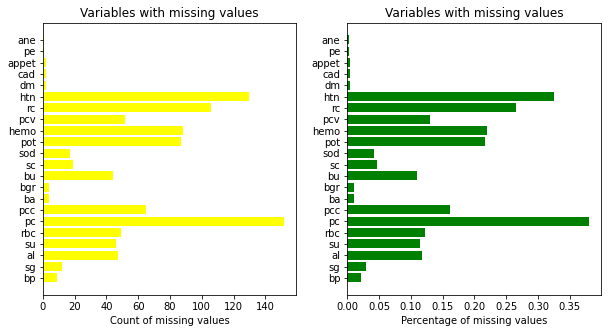

In [33]:
labels = []
valuecount = []
percentcount = []
for col in missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0]) 
ind = np.arange(len(labels))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
rects = ax1.barh(ind, np.array(valuecount), color='yellow')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");
rects = ax2.barh(ind, np.array(percentcount), color='green')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

In [34]:
print("Total count of missing value in a dataset:",df.isnull().sum().sum() )


Total count of missing value in a dataset: 939


## HANDLING NULL VALUES

In [35]:
df['bp'] = df['bp'].fillna(df['bp'].mean())
df["bp"].isnull().sum()

0

In [36]:
df['sg'] = df['sg'].fillna(df['sg'].mean())
df["sg"].isnull().sum()

0

In [37]:
df['al'] = df['al'].fillna(df['al'].mean())
df["al"].isnull().sum()

0

In [38]:
df['su'] = df['su'].fillna(df['su'].mean())
df["su"].isnull().sum()

0

In [39]:
df['rbc'] = df['rbc'].fillna("not mentioned")
df["rbc"].isnull().sum()

0

In [40]:
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df["pc"].isnull().sum()

0

In [41]:
df = df.dropna(axis=0, subset=['pcc',"htn","appet"])


In [42]:
df['bgr'] = df['al'].fillna(df['al'].mean())
df["bgr"].isnull().sum()

0

In [43]:
df['bu'] = df['bu'].fillna(df['bu'].mean())
df["bu"].isnull().sum()

0

In [44]:
df['sc'] = df['sc'].fillna(df['sc'].mean())
df['sod'] = df['sod'].fillna(df['sod'].mean())


In [45]:
df['pot'] = df['pot'].fillna(df['pot'].mean())
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['hemo'] = df['hemo'].fillna(df['hemo'].mean())


In [46]:
df['rc'] = df['rc'].fillna("not mentioned")
df["rc"].isnull().sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              236 non-null    float64
 1   sg              236 non-null    float64
 2   al              236 non-null    float64
 3   su              236 non-null    float64
 4   rbc             236 non-null    object 
 5   pc              236 non-null    object 
 6   pcc             236 non-null    object 
 7   ba              233 non-null    object 
 8   bgr             236 non-null    float64
 9   bu              236 non-null    float64
 10  sc              236 non-null    float64
 11  sod             236 non-null    float64
 12  pot             236 non-null    float64
 13  hemo            236 non-null    float64
 14  pcv             236 non-null    float64
 15  rc              236 non-null    object 
 16  htn             236 non-null    object 
 17  dm              236 non-null    obj

In [48]:
df.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                3
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                1
ane               1
classification    0
dtype: int64

## HANDLING CATEGORICAL DATA

In [49]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")
        


 rbc
0.0              201
1.0               10
2.0                8
4.0                7
3.0                7
5.0                2
not mentioned      1
Name: rbc, dtype: int64 


 pc
normal      213
abnormal     23
Name: pc, dtype: int64 


 pcc
normal      186
abnormal     50
Name: pcc, dtype: int64 


 ba
notpresent    209
present        24
Name: ba, dtype: int64 


 rc
9200.0     8
6700.0     8
7200.0     8
9100.0     7
7800.0     6
          ..
16700.0    1
2600.0     1
11900.0    1
8800.0     1
26400.0    1
Name: rc, Length: 84, dtype: int64 


 htn
5.2    16
4.5    15
3.9    10
4.7    10
4.9    10
5      10
4.8     9
3.4     9
4.6     8
5.5     8
3.7     7
5.8     7
5.3     7
6.1     7
4       6
5.4     6
4.3     6
5.6     6
4.1     5
3.8     5
3.2     5
5.7     5
5.9     5
6.2     5
6.4     5
5.1     4
6.3     4
6.5     4
4.2     4
6       4
3.3     3
3.5     3
3.6     3
4.4     2
3       2
2.9     2
2.1     2
2.8     2
3.1     1
2.5     1
8       1
2.7     1
2.6     1
Name: ht

In [50]:
for column in df:
     if (df[column].dtype=="object"):        
        df.drop(df[(df[column] =="ckd\t") | (df[column] == "\tno") |(df[column] == " yes")| (df[column] == "\tyes") |(df[column] == "\t43")| (df[column]=="\t?")].index, inplace=True)


In [51]:
for column in df:
     if (df[column].dtype=="object"):
        print("\n",column)
        print(df[column].value_counts(),"\n")


 rbc
0.0              201
1.0               10
2.0                8
4.0                7
3.0                7
5.0                2
not mentioned      1
Name: rbc, dtype: int64 


 pc
normal      213
abnormal     23
Name: pc, dtype: int64 


 pcc
normal      186
abnormal     50
Name: pcc, dtype: int64 


 ba
notpresent    209
present        24
Name: ba, dtype: int64 


 rc
9200.0     8
6700.0     8
7200.0     8
9100.0     7
7800.0     6
          ..
16700.0    1
2600.0     1
11900.0    1
8800.0     1
26400.0    1
Name: rc, Length: 84, dtype: int64 


 htn
5.2    16
4.5    15
3.9    10
4.7    10
4.9    10
5      10
4.8     9
3.4     9
4.6     8
5.5     8
3.7     7
5.8     7
5.3     7
6.1     7
4       6
5.4     6
4.3     6
5.6     6
4.1     5
3.8     5
3.2     5
5.7     5
5.9     5
6.2     5
6.4     5
5.1     4
6.3     4
6.5     4
4.2     4
6       4
3.3     3
3.5     3
3.6     3
4.4     2
3       2
2.9     2
2.1     2
2.8     2
3.1     1
2.5     1
8       1
2.7     1
2.6     1
Name: ht

## LABEL ENCODING

In [58]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index([], dtype='object')


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              236 non-null    float64
 1   sg              236 non-null    float64
 2   al              236 non-null    float64
 3   su              236 non-null    float64
 4   rbc             236 non-null    int64  
 5   pc              236 non-null    int64  
 6   pcc             236 non-null    int64  
 7   ba              236 non-null    int64  
 8   bgr             236 non-null    float64
 9   bu              236 non-null    float64
 10  sc              236 non-null    float64
 11  sod             236 non-null    float64
 12  pot             236 non-null    float64
 13  hemo            236 non-null    float64
 14  pcv             236 non-null    float64
 15  rc              236 non-null    int64  
 16  htn             236 non-null    int64  
 17  dm              236 non-null    int

In [60]:
df.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
rc                  int64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object